In [135]:
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import pyplot as PLT

In [136]:
path = "/Users/guilhermeviveiros/Desktop/Face_Regonition/mlFacesResized/"

In [137]:
def getExtension(filename):
   fileName, fileExtension = os.path.splitext(filename)
   return fileExtension

def inArray(array, to_look):
    for x in array:
	    if(to_look[1:] == x):
		    return True

def isImage(filename):
   # Extensions to search
   extensions = ['jpeg', 'jpg', 'jpe','png'];
   extension = getExtension(filename)
   if (inArray(extensions, extension)):
       return True
   return False

In [138]:
# trainset constituido por 8 imagens de cada elemento(somos 5 por agora) 45 imagens
# test set consituido por 2 imagens de cada elemento
# cada imagem tem dimensão  de 1536 × 2048 

def set_dataset(path,number_images, width, height):
    
    #o 3 vem do RGB
    train_set = np.empty(shape=(number_images,width,height,3));
    test_set = np.empty(shape=(2*5,width,height,3));
    answer_test = [];
    
    
    mlfaces = os.listdir(os.path.expanduser(
        path
    ))
    
    tmp_train_set = 0;
    tmp_test_set = 0;
    
    for user in mlfaces:
        
        if not user == ".DS_Store":
        
            user_images = os.listdir(os.path.expanduser(
                path + user
            ))
            
            tmp = 1;
            
            
            for image in user_images:
            
                
                if(isImage(image)):
        
                    image_path = path + user + "/" + image
                    #print(image_path)
                
                    im = mpimg.imread(image_path)
                    
                    
                    if(tmp < 9):
                        train_set[tmp_train_set] = im;
                        tmp_train_set = tmp_train_set+1;
                    else : 
                        test_set[tmp_test_set] = im;
                        answer_test.append(user);
                        tmp_test_set = tmp_test_set+1;
                        
                        
                    tmp = tmp+1;     
                
        
                    
                
    return train_set,test_set,answer_test;


In [139]:
# trainset constituido por 8 imagens de cada elemento(somos 5 por agora) 45 imagens
# test set consituido por 2 imagens de cada elemento
# cada imagem tem dimensão  de 1536 × 2048 

train_set,test_set,answer_test = set_dataset(path,45,255,255);

In [140]:
print("Train set with a shape of -> " + str(train_set.shape))
print("Test set with a shape of -> " + str(test_set.shape))
print(answer_test)

Train set with a shape of -> (45, 255, 255, 3)
Test set with a shape of -> (10, 255, 255, 3)
['andrade', 'andrade', 'gabi', 'gabi', 'guilherme', 'guilherme', 'rc', 'rc', 'rui', 'rui']


In [141]:
#1) calcular a matriz de covariancia

#temos que ter 45 amostras, cada amostra com a sua respeitva coluna, logo vou passar de (2048,1536,3) para (2048*1536*3)
train_set = train_set.reshape(train_set.shape[0], (train_set.shape[1]*train_set.shape[2]*train_set.shape[3]))
test_set = test_set.reshape(test_set.shape[0], (test_set.shape[1]*test_set.shape[2]*test_set.shape[3]))

In [142]:
print("Train set with a shape of -> " + str(train_set.shape))
print("Test set with a shape of -> " + str(test_set.shape))
#cada amostra/linha tem todas as suas features representadas por coluna (pixeis)

Train set with a shape of -> (45, 195075)
Test set with a shape of -> (10, 195075)


In [143]:
#centralizar a matriz e fazer svd , depois valores singulares ^2 = valores proprios
means = np.mean(train_set,0)

In [144]:
#subtraio a cada atributo pela sua média
train_set = train_set - means
print(train_set.shape)

(45, 195075)


In [145]:
#quero que os vetores próprios deem -> N por M (n -> numero de elementos) (m -> atributos)
vet_prop, val_sing, v = np.linalg.svd(train_set.T,full_matrices=False)

In [146]:
val_prop = val_sing #* val_sing

In [147]:
print(vet_prop.shape)
print(val_prop.shape)
print(val_prop)

(195075, 45)
(45,)
[1.06185181e+03 4.32841429e+02 2.33979421e+02 1.66807088e+02
 1.50398184e+02 1.08156205e+02 8.57804048e+01 7.96927419e+01
 7.84868234e+01 6.82130732e+01 6.75736326e+01 6.38606860e+01
 5.90183476e+01 5.69323058e+01 5.64139940e+01 5.20267635e+01
 5.02041141e+01 4.91904766e+01 4.69735991e+01 4.36433721e+01
 4.30563486e+01 4.14683307e+01 4.00057256e+01 3.91271186e+01
 3.80814457e+01 3.65605217e+01 3.47971909e+01 3.46923285e+01
 3.39401130e+01 3.31180577e+01 3.22766025e+01 3.04807837e+01
 2.94648266e+01 2.86710023e+01 2.83562935e+01 2.76041349e+01
 2.49160095e+01 2.29709253e+01 2.16773544e+01 1.48235657e+01
 3.13448089e-13 8.63449046e-14 7.76953903e-14 7.76953903e-14
 7.76953903e-14]


In [148]:
cov = np.cov(train_set)

In [149]:
#2) ver quantos valores próprios é que são relevantes
diag = np.sum(val_prop)
confianca_alvo = 0.9
k = 0
confianca = 0
while confianca < confianca_alvo:
    confianca= confianca + (val_prop[k]/diag)
    k += 1
k, confianca

(27, 0.9004992463714458)

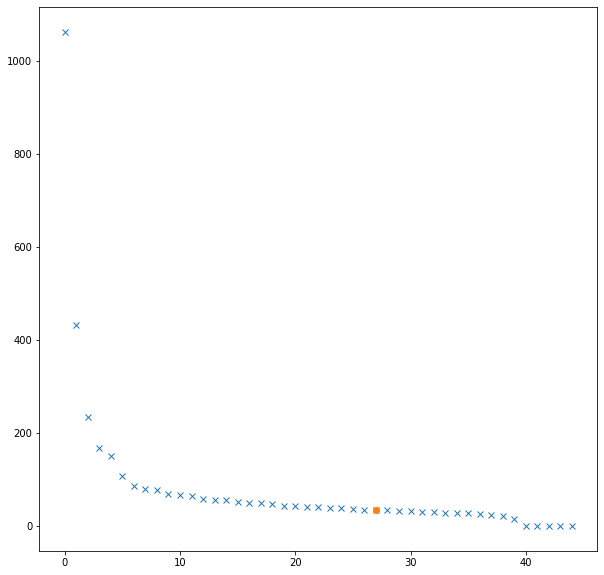

In [150]:
plt.figure(figsize=(10,10))
M = 45 #representa o número de valores próprios
t = np.arange(0, M, 1)
plt.plot(t, val_prop, 'x')
plt.plot(k, val_prop[k], 'o')
plt.show()

In [151]:
#podemos reparar pelo método do cotovelo que com 3 vetores próprios temos uma boa representação do conjunto de imagens
#observemos em baixo os primeiros vetores próprios(aqueles que representam melhor o dataset)
print(vet_prop.shape)

(195075, 45)


<function matplotlib.pyplot.show(*args, **kw)>

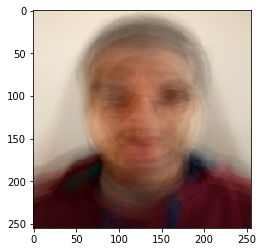

In [167]:
#display(plt.matshow(np.reshape(v[0], (255,255,3)), cmap='gray'))
from matplotlib import pyplot as PLT

PLT.imshow(np.abs(np.reshape(vet_prop[:,0],(255,255,3))*255))
PLT.show

In [153]:
W = vet_prop[0:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]]

In [154]:
print(W.shape)
print(train_set.shape)

(195075, 29)
(45, 195075)


In [155]:
train_setT = train_set.T

In [156]:
projecao_interna = np.dot(train_set,W)
print(projecao_interna.shape)

(45, 29)


In [157]:
test_set = test_set - means
print(test_set.shape)

(10, 195075)


In [158]:
projecao_test = np.dot(test_set, W)
print(projecao_test.shape)

(10, 29)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


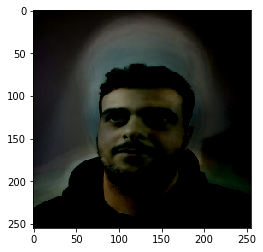

In [159]:
#I will test with this image
#fica assim porque os pixeis estão centrados
plt.imshow(test_set[9].reshape(255,255,3))

In [160]:
dist = np.zeros(shape=(10,45))
d_min = np.zeros(shape=(10))

for i in range(0,test_set.shape[0]):
    dist[i] = [np.linalg.norm(projecao_interna[l] - projecao_test[i]) for l in range(45)]
    d_min[i] = np.min(dist[i])

In [161]:
print(d_min)
print(dist[8])

[21.20473774 32.97516596 14.15103814 20.60323502  9.58227185 16.86629152
 53.72951967 42.52059845 36.63370054 43.56194975]
[123.51096825 128.25153028 124.44980135 131.55767658 125.90765137
 127.53435377 135.96603666 126.02165207 192.2941198  193.05630689
 195.54379082 191.8667785  196.23397661 198.07393354 193.02015469
 193.93212186  95.10129212  99.18344399  93.18679706  71.94773707
  86.2584213   84.26276759  93.77542789  89.49811028 100.89122536
 103.20118707 100.18237693  99.33809233  99.75697173 105.56003815
 123.87022743 119.00557961  85.44711318  36.63370054  68.92341179
  96.36986821  65.64300038  88.69854142  53.37104329  40.05752741
 503.81609086 503.81609086 503.81609086 503.81609086 503.81609086]


In [162]:
len(dist) #45 pontos relativos à imagem

10

In [163]:
ind = [np.argmin(x) for x in dist]
ind
#diz o índice do elemento mínimo correspondentes à distancia

[1, 5, 14, 12, 17, 19, 31, 26, 33, 38]

In [164]:
#Com este indice consigo ver qual o elemento
def ind_to_name(ind):
    ind = ind+1;
    if ind < 9  :
        tmp = "andrade"
        #break;
    elif ind < 17:
        tmp = "gabi"
        #break;
    elif ind < 25:
        tmp = "guilherme"
        #break;
    elif ind < 33:
        tmp = "rc"
        #break;
    elif ind < 41:
        tmp = "rui"
        #break;
    else:
       print("Não reconhecemos")
    return tmp

In [165]:
tmp = 1
for i in range(0,len(ind)):
    name = ind_to_name(ind[i])
    
    if(name == answer_test[i]):
        print("Image " + str(tmp) + " is ok!")
    else:
        print("Image " + str(tmp) + " isnt ok!")
        print("Image of -> " + str(answer_test[i]))
        print("Predicted -> " + name)
    
    tmp+=1


Image 1 is ok!
Image 2 is ok!
Image 3 is ok!
Image 4 is ok!
Image 5 is ok!
Image 6 is ok!
Image 7 is ok!
Image 8 is ok!
Image 9 is ok!
Image 10 is ok!
